## Observations and Insights 

The first major observation that can be derived from the data below is in the Summary Statistics table in which the mean tumor volume for the Capomulin and Ramicane drug regimens are about 20% lower than the other treatment regimens with values of 40.67mm^3 and 40.21mm^3, respectively.

The second major observations is dervied from the Outlier Analysis and Box Plots where the Capomulin regimen shows more consistency of tumor size reduction results versus the Ramicane regimen as evidenced by the smaller interquartile range (7.8mm^3 for Capomulin vs 9.1mm^3 for Ramicane).  But the median value for Ramicane (36.6mm^3) is less than Capomulin (38.1mm^3) showing Ramicane with slightly better tumor reduction results.

The third major observation is that there is a strong positive correlation between the Avg Tumor Volume and the Mouse Weight for the Capomulin regimen with an r^2 value of 0.84 from the linear regression.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count2 = merged_df['Mouse ID'].nunique()
mice_count2

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
duplicates_bool = merged_df.duplicated(subset=['Mouse ID','Timepoint'])
duplicates = merged_df.loc[duplicates_bool==True]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
duplicate_info = merged_df[merged_df.duplicated()]
duplicate_info = duplicate_info.rename(columns={'Mouse ID':'Mouse_ID'})

duplicate_mouse = duplicate_info.iloc[0]['Mouse_ID']
duplicate_mouse

'g989'

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.rename(columns={'Mouse ID':'Mouse_ID',
                                     'Tumor Volume (mm3)':'Tumor_Volume_mm3',
                                     'Drug Regimen':'Drug_Regimen'})
clean_df = clean_df[clean_df.Mouse_ID != duplicate_mouse]
clean_df.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count3 = clean_df['Mouse_ID'].nunique()
mice_count3

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
drugreg_df = clean_df.groupby('Drug_Regimen')
drugreg_tv_df = drugreg_df['Tumor_Volume_mm3']
drugreg_tv_mean = drugreg_tv_df.mean()
drugreg_tv_median = drugreg_tv_df.median()
drugreg_tv_var = drugreg_tv_df.var()
drugreg_tv_std = drugreg_tv_df.std()
drugreg_tv_sem = drugreg_tv_df.sem()

# Create summary dataframe
summary_df = pd.DataFrame({'Mean':drugreg_tv_mean,
                           'Median':drugreg_tv_median,
                           'Variance':drugreg_tv_var,
                           'Standard Deviation':drugreg_tv_std,
                           'SEM':drugreg_tv_sem  
                           })
summary_df = summary_df.reset_index()
summary_df = summary_df.rename(columns={'Drug_Regimen':'Drug Regimen'})
summary_df = summary_df.style.set_caption("Tumor Volume mm3 Summary Statistics by Drug Regimen")
summary_df

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(['Drug_Regimen']).agg({'Tumor_Volume_mm3':['mean','median','var','std','sem']})
summary_agg

Tumor_Volume_mm3                                          
                         mean     median        var       std       sem
Drug_Regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol           52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril            55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol            54.331565  52.509285  66.173479  8.134708  0.596466
Placebo             54.033581  52.288934  61.168083  7.821003  0.581331
Propriva            52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane            40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn            54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol           53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


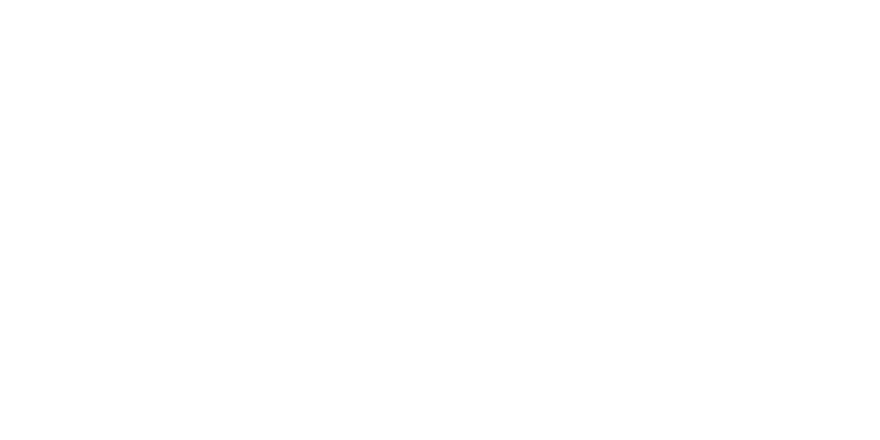

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested
# for each drug regimen using Pandas.

%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

timepoint_count = drugreg_tv_df.count()
timepoint_df = pd.DataFrame({'Timepoint_Count':timepoint_count})
timepoint_df = timepoint_df.reset_index()
timepoint_df[['Drug_Regimen','Timepoint_Count']].set_index('Drug_Regimen').plot.bar(figsize=(8,4),
                        title="Total Number of Timepoints for All Mice Tested by Drug Regimen",
                        facecolor='red', alpha=0.5, grid=True, legend = False)
plt.ylabel("Count of Timepoints")
plt.tight_layout()

<IPython.core.display.Javascript object>


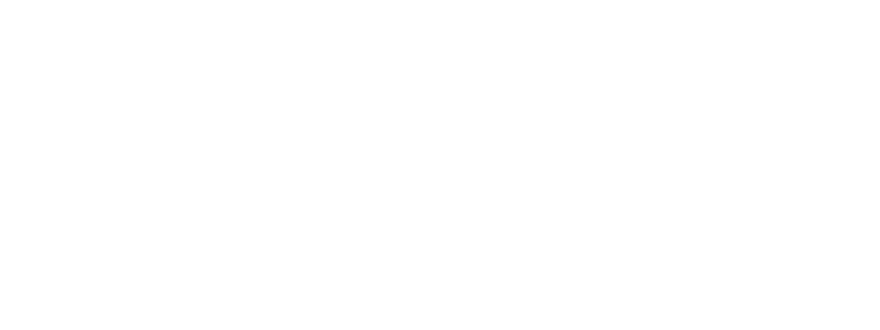

In [10]:
x_axis = np.arange(len(timepoint_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,3))
plt.bar(x_axis, timepoint_df["Timepoint_Count"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, timepoint_df["Drug_Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(timepoint_df["Timepoint_Count"])+10)
plt.title("Total Number of Timepoints for All Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Timepoints")
plt.grid(b=True,color='grey',linewidth=0.5,alpha=0.75)
label = timepoint_df['Timepoint_Count']
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


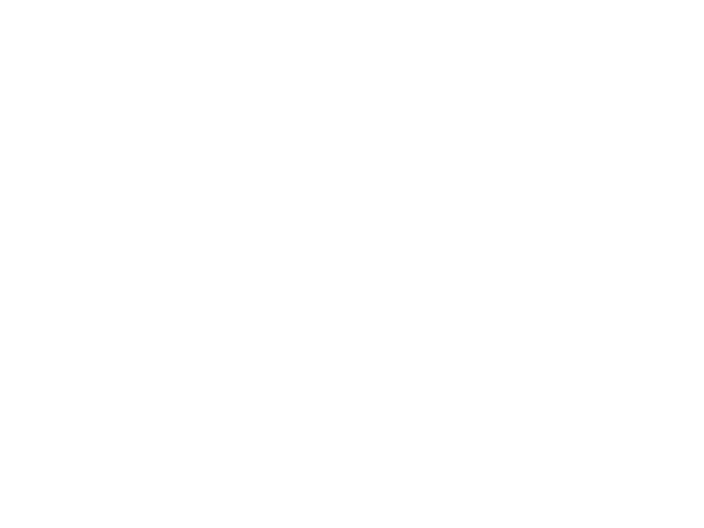

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

sex_df = clean_df.groupby('Sex')
sex_df2 = sex_df['Sex']
sex_count = sex_df2.count()

sex_pie = sex_count.plot(kind="pie", title=("Distribution of Female to Male Mice"),
                         shadow=True, startangle=90, autopct='%1.1f%%',
                        colors=['pink','lightblue'], explode = [0.05,0.05],
                        wedgeprops={'linewidth':2,'edgecolor':'gray'},
                        textprops = {'weight':'bold'})
plt.tight_layout()
plt.axis("equal")
plt.show()

<IPython.core.display.Javascript object>


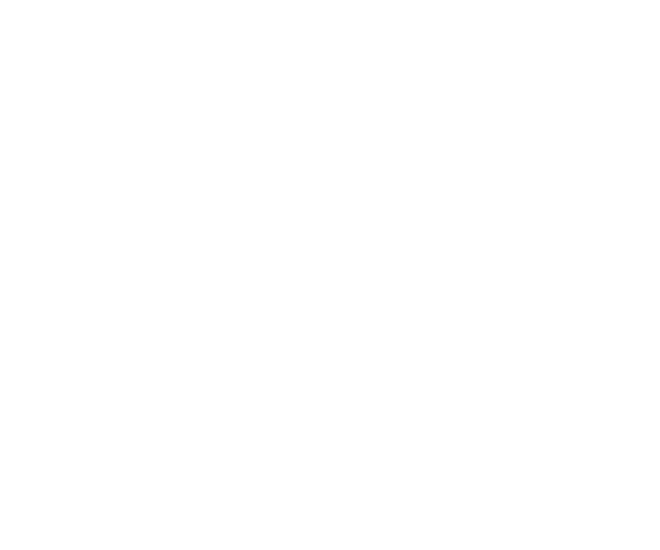

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
colors = ('pink','lightblue')
fig,ax=plt.subplots(figsize=(6,5))
wedges,texts,autotexts = ax.pie(sex_count,
                               autopct='%1.1f%%',
                               explode=(0.05,0.05),
                               labels=sex_count.index,
                               shadow=True,
                               colors=colors,
                               startangle=90,
                               wedgeprops={'linewidth':2,'edgecolor':'gray'},
                               textprops = {'weight':'bold'})
ax.set_title("Distribution of Female to Male Mice")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_df.groupby(['Mouse_ID','Drug_Regimen'])
max_tp_df = pd.DataFrame(max_tp['Timepoint'].max())
max_tp_df.reset_index(inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(max_tp_df, clean_df, on="Mouse_ID", how="left")
merge_df = merge_df[(merge_df.Drug_Regimen_x == 'Capomulin') | 
                    (merge_df.Drug_Regimen_x == 'Ramicane') |
                    (merge_df.Drug_Regimen_x == 'Infubinol') |
                    (merge_df.Drug_Regimen_x == 'Ceftamin')]
merge_df = merge_df[(merge_df.Timepoint_x == merge_df.Timepoint_y)]
merge_df.reset_index(inplace=True)
merge_df = merge_df[['Mouse_ID','Drug_Regimen_x','Tumor_Volume_mm3']]
merge_df = merge_df.rename(columns={'Drug_Regimen_x':'Drug_Regimen','Tumor_Volume_mm3':'Final_Tumor_Volume_mm3'})
merge_df

,Mouse_ID,Drug_Regimen,Final_Tumor_Volume_mm3
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [14]:
import scipy.stats as sts
import numpy as np

# Put treatments into a list for for loop (and later for plot labels)
drug_reg_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
drug_reg_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for drug in drug_reg_list:
    iter_df = merge_df[merge_df.Drug_Regimen == drug]
    mouse_tumor_vol = iter_df.Final_Tumor_Volume_mm3
    tumor_vol_data.append(mouse_tumor_vol)

tumor_vol_data
tv_df=pd.DataFrame(tumor_vol_data)
tv_df = tv_df.transpose()
tv_df

counter = 0
for drug in drug_reg_list:
    tv_df.columns.values[counter]=drug
    counter += 1

cap_data = tv_df['Capomulin'].tolist()
filtered_cap = np.array(cap_data)[~np.isnan(cap_data)]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_reg_list:
    print(f"{drug} Outlier Analysis")
    print("\n")
    quartiles = tv_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    print(f"The lower quartile of {drug} is: {lowerq:0.1f}")
    print(f"The upper quartile of {drug} is: {upperq:0.1f}")
    print(f"The interquartile range of {drug} is: {iqr:0.1f}")
    print(f"The interquartile * 1.5 range of {drug} is: {iqr_1_5:0.1f}")
    print(f"The the median of {drug} is: {quartiles[0.5]:0.1f} ")
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    print(f"Values below {lower_bound:0.1f} could be outliers.")
    print(f"Values above {upper_bound:0.1f} could be outliers.")
    print("\n")
    print("------------------------------")
    print("\n")

Capomulin Outlier Analysis


The lower quartile of Capomulin is: 32.4
The upper quartile of Capomulin is: 40.2
The interquartile range of Capomulin is: 7.8
The interquartile * 1.5 range of Capomulin is: 11.7
The the median of Capomulin is: 38.1 
Values below 20.7 could be outliers.
Values above 51.8 could be outliers.


------------------------------


Ramicane Outlier Analysis


The lower quartile of Ramicane is: 31.6
The upper quartile of Ramicane is: 40.7
The interquartile range of Ramicane is: 9.1
The interquartile * 1.5 range of Ramicane is: 13.6
The the median of Ramicane is: 36.6 
Values below 17.9 could be outliers.
Values above 54.3 could be outliers.


------------------------------


Infubinol Outlier Analysis


The lower quartile of Infubinol is: 54.0
The upper quartile of Infubinol is: 65.5
The interquartile range of Infubinol is: 11.5
The interquartile * 1.5 range of Infubinol is: 17.2
The the median of Infubinol is: 60.2 
Values below 36.8 could be outliers.
Values above

<IPython.core.display.Javascript object>


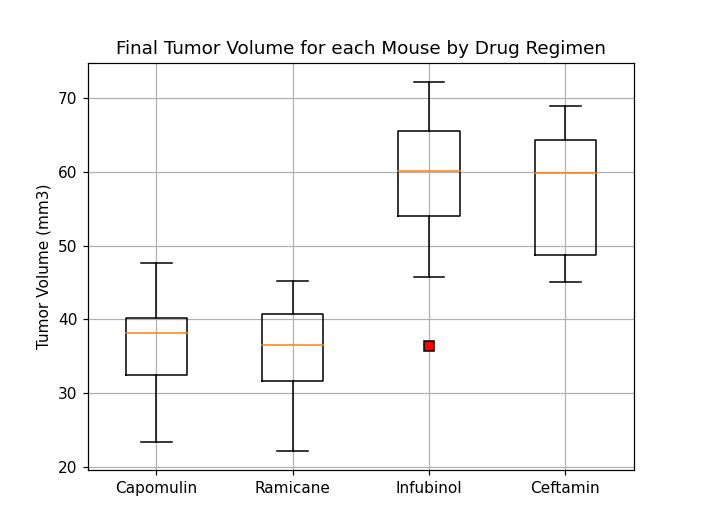

In [15]:
%matplotlib notebook

data = tv_df['Capomulin'].tolist()
filtered_cap = np.array(data)[~np.isnan(data)]
data = tv_df['Ramicane'].tolist()
filtered_ram = np.array(data)[~np.isnan(data)]
data = tv_df['Infubinol'].tolist()
filtered_inf = np.array(data)[~np.isnan(data)]
data = tv_df['Ceftamin'].tolist()
filtered_cef = np.array(data)[~np.isnan(data)]
data = [filtered_cap,filtered_ram,filtered_inf,filtered_cef]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for each Mouse by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

ax1.boxplot(data,flierprops=red_square)
plt.grid()
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


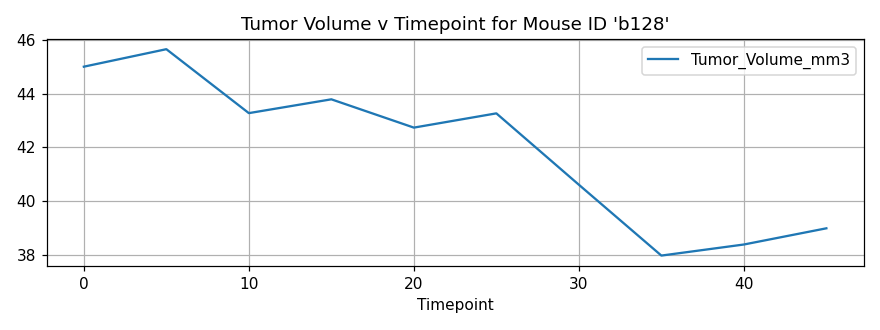

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_df[(clean_df.Mouse_ID == 'b128')]
mouse_df = mouse_df[['Timepoint','Tumor_Volume_mm3']]
mouse_df = mouse_df.set_index('Timepoint')
mouse_df.plot(kind="line", figsize=(8,3), title="Tumor Volume v Timepoint for Mouse ID 'b128'",grid=True)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


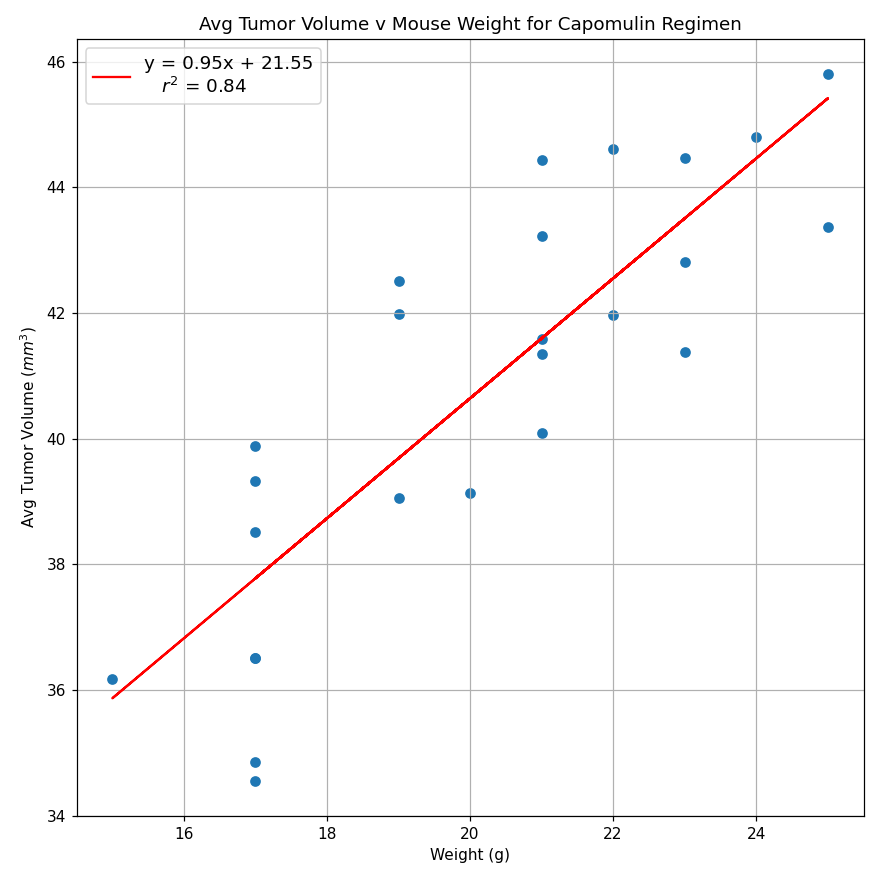

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_reg = clean_df[(clean_df.Drug_Regimen == 'Capomulin')]
avg_tum = cap_reg.groupby(['Mouse_ID'])
avg_tum2 = avg_tum.mean()

avg_tum2.plot(kind="scatter", x="Weight (g)", y="Tumor_Volume_mm3", grid=True, figsize=(8,8),
              title="Mouse Weight v Avg Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

In [18]:
from scipy.stats import linregress

avg_tum2.head()

,Age_months,Weight (g),Timepoint,Tumor_Volume_mm3,Metastatic Sites
Mouse_ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [19]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = avg_tum2.iloc[:,1]
avg_tum_vol = avg_tum2.iloc[:,3]
correlation = st.pearsonr(weight,avg_tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [20]:
# Calculate linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tum2['Weight (g)']
y_values = avg_tum2['Tumor_Volume_mm3']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = x_values * slope + intercept
plt.plot(x_values,line,'r',label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.scatter(x_values,y_values)
plt.title("Avg Tumor Volume v Mouse Weight for Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume ($mm^3$)')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()